# ESG Analysis Visualizations

This notebook contains visualizations for analyzing the relationship between ESG scores and stock performance.

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats



# Read the merged data
df = pd.read_csv('merged_data.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ticker              171 non-null    object 
 1   YTD_Change          171 non-null    float64
 2   6M_Change           171 non-null    float64
 3   1Y_Change           171 non-null    float64
 4   3Y_Change           171 non-null    float64
 5   5Y_Change           171 non-null    float64
 6   10Y_Change          171 non-null    float64
 7   Name                171 non-null    object 
 8   Sector              171 non-null    object 
 9   Price               171 non-null    float64
 10  Price/Earnings      171 non-null    float64
 11  Dividend Yield      171 non-null    float64
 12  Earnings/Share      171 non-null    float64
 13  Market Cap          171 non-null    float64
 14  EBITDA              171 non-null    float64
 15  GIS Sector          171 non-null    object 

## 1. Overall Performance Correlation

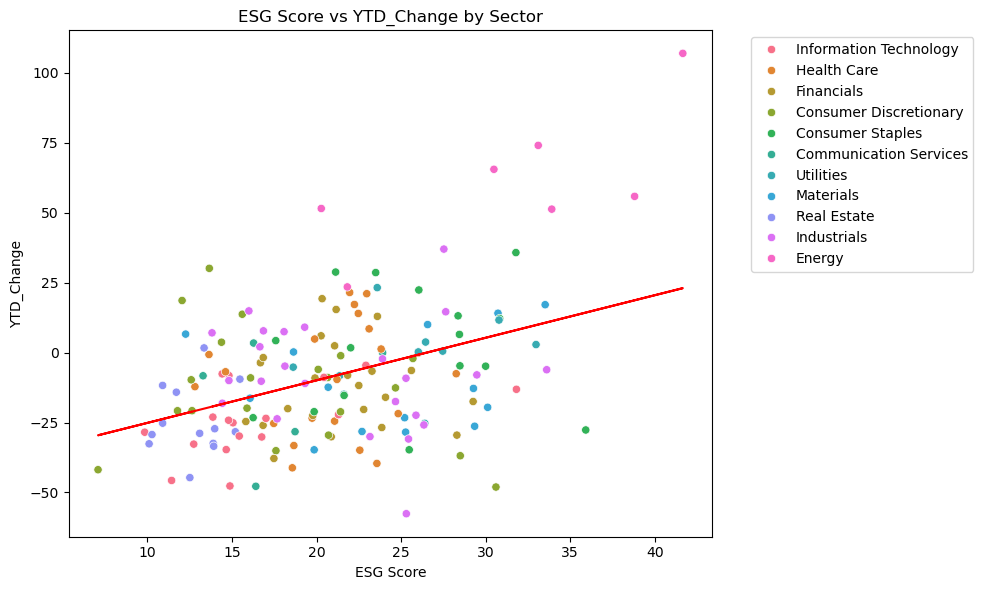

Correlation coefficient: 0.406
P-value: 0.000


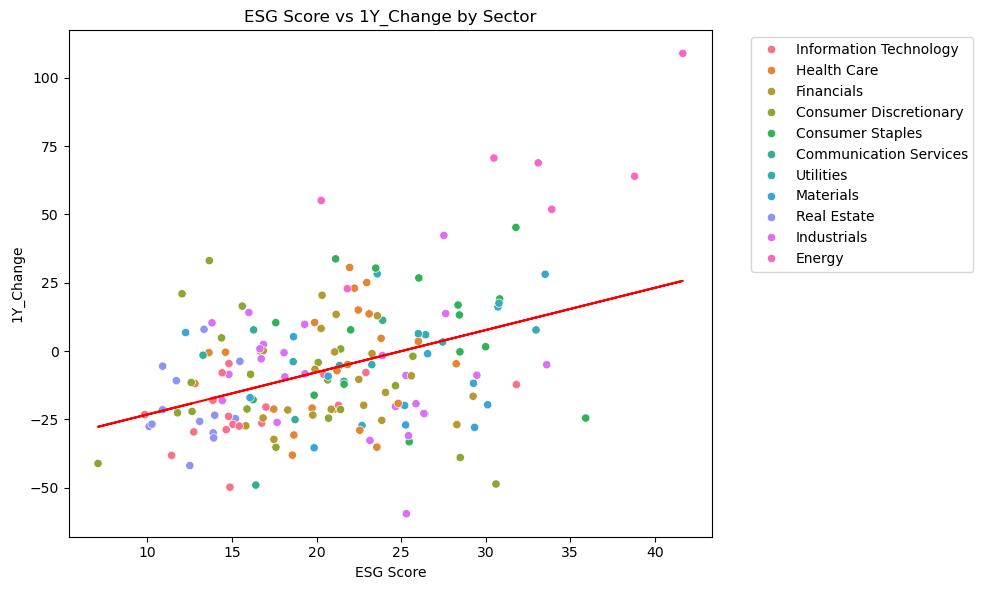

Correlation coefficient: 0.403
P-value: 0.000


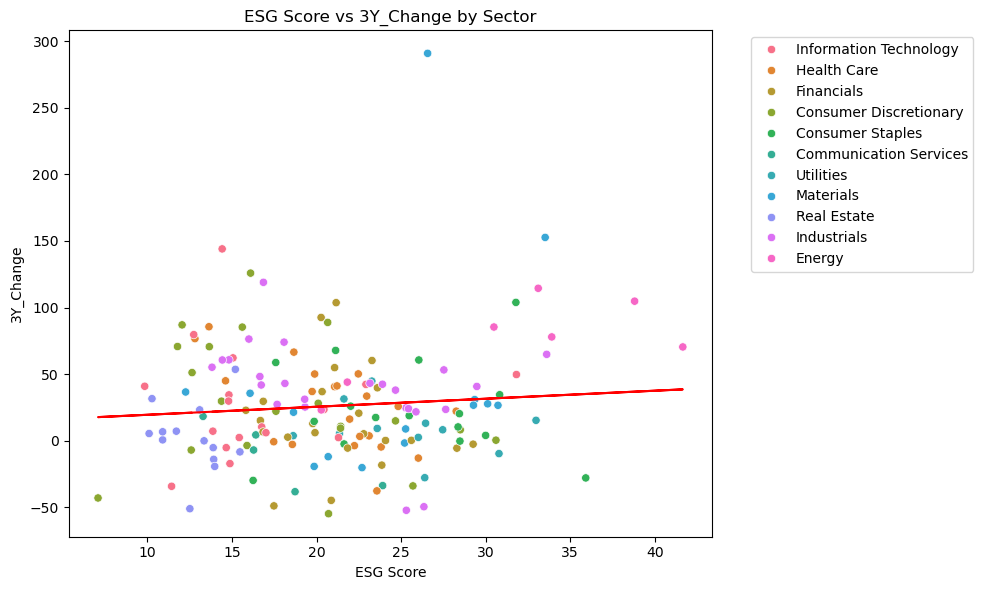

Correlation coefficient: 0.088
P-value: 0.251


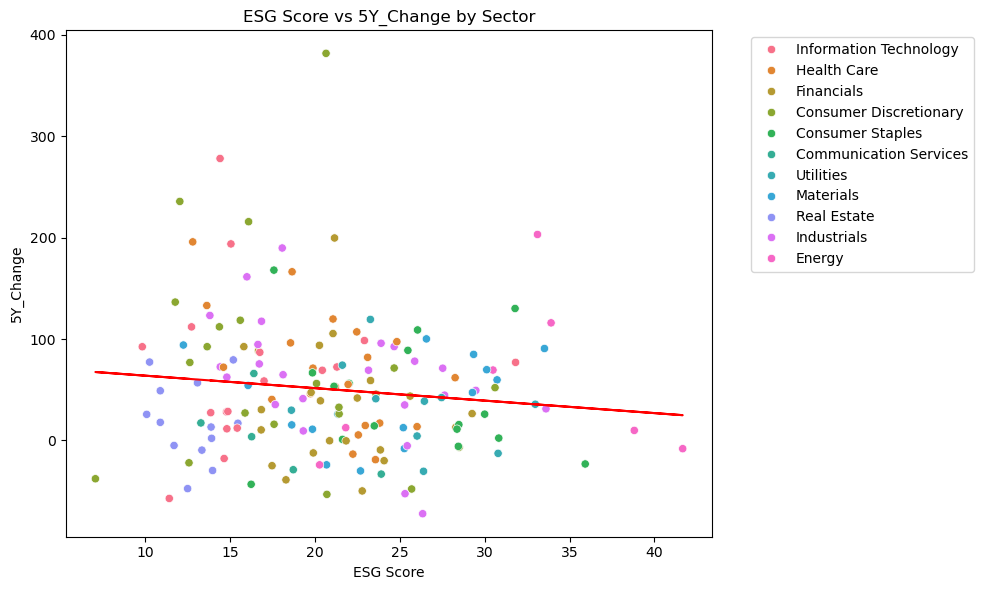

Correlation coefficient: -0.118
P-value: 0.123


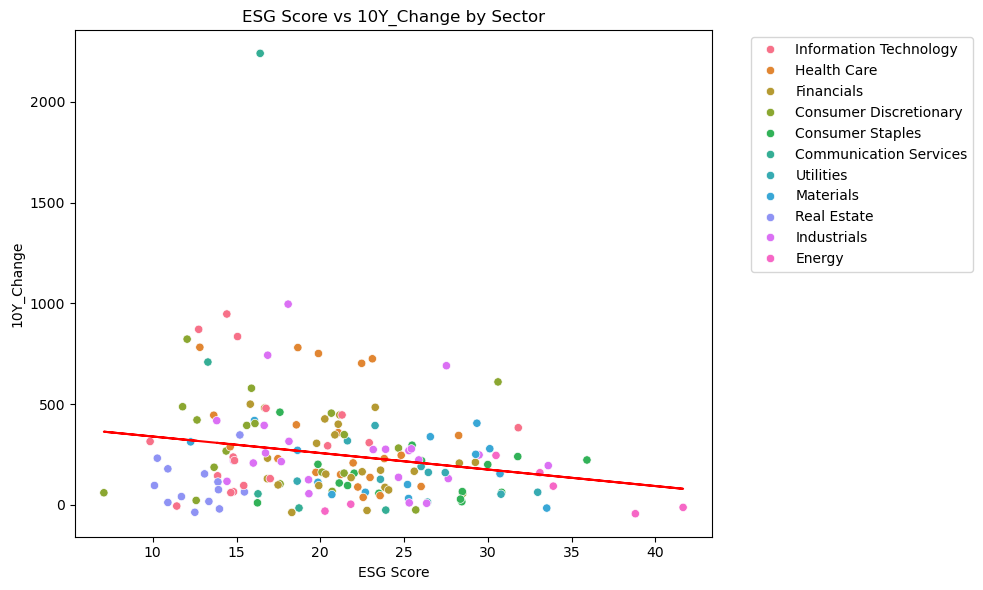

Correlation coefficient: -0.197
P-value: 0.010


In [10]:
# Scatterplots with regression lines
return_metrics = ['YTD_Change', '1Y_Change', '3Y_Change', '5Y_Change', '10Y_Change']

for metric in return_metrics:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='totalEsg', y=metric, hue='GIS Sector')
    
    # Add regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['totalEsg'], df[metric])
    plt.plot(df['totalEsg'], slope * df['totalEsg'] + intercept, color='red')
    
    plt.title(f'ESG Score vs {metric} by Sector')
    plt.xlabel('ESG Score')
    plt.ylabel(metric)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    print(f"Correlation coefficient: {r_value:.3f}")
    print(f"P-value: {p_value:.3f}")

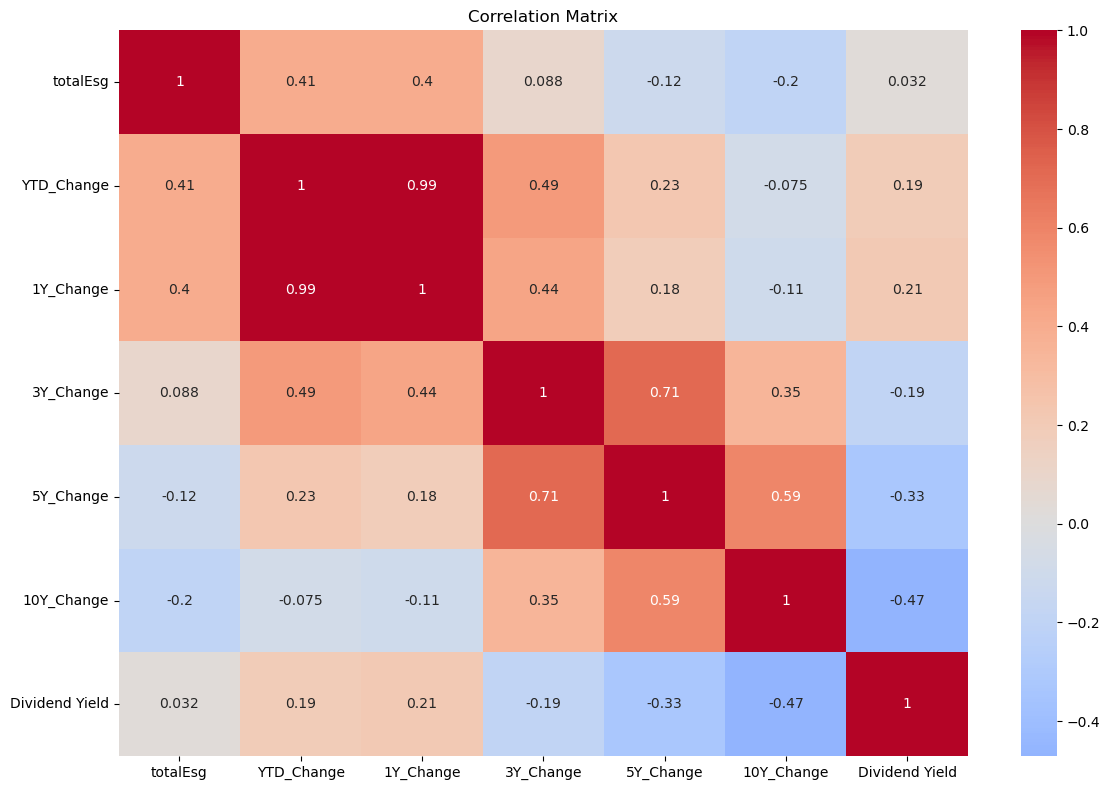

In [11]:
# Correlation Heatmap
correlation_columns = ['totalEsg', 'YTD_Change', '1Y_Change', '3Y_Change', 
                      '5Y_Change', '10Y_Change', 'Dividend Yield']

plt.figure(figsize=(12, 8))
sns.heatmap(df_sorted[correlation_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 2. Sector-Based Insights

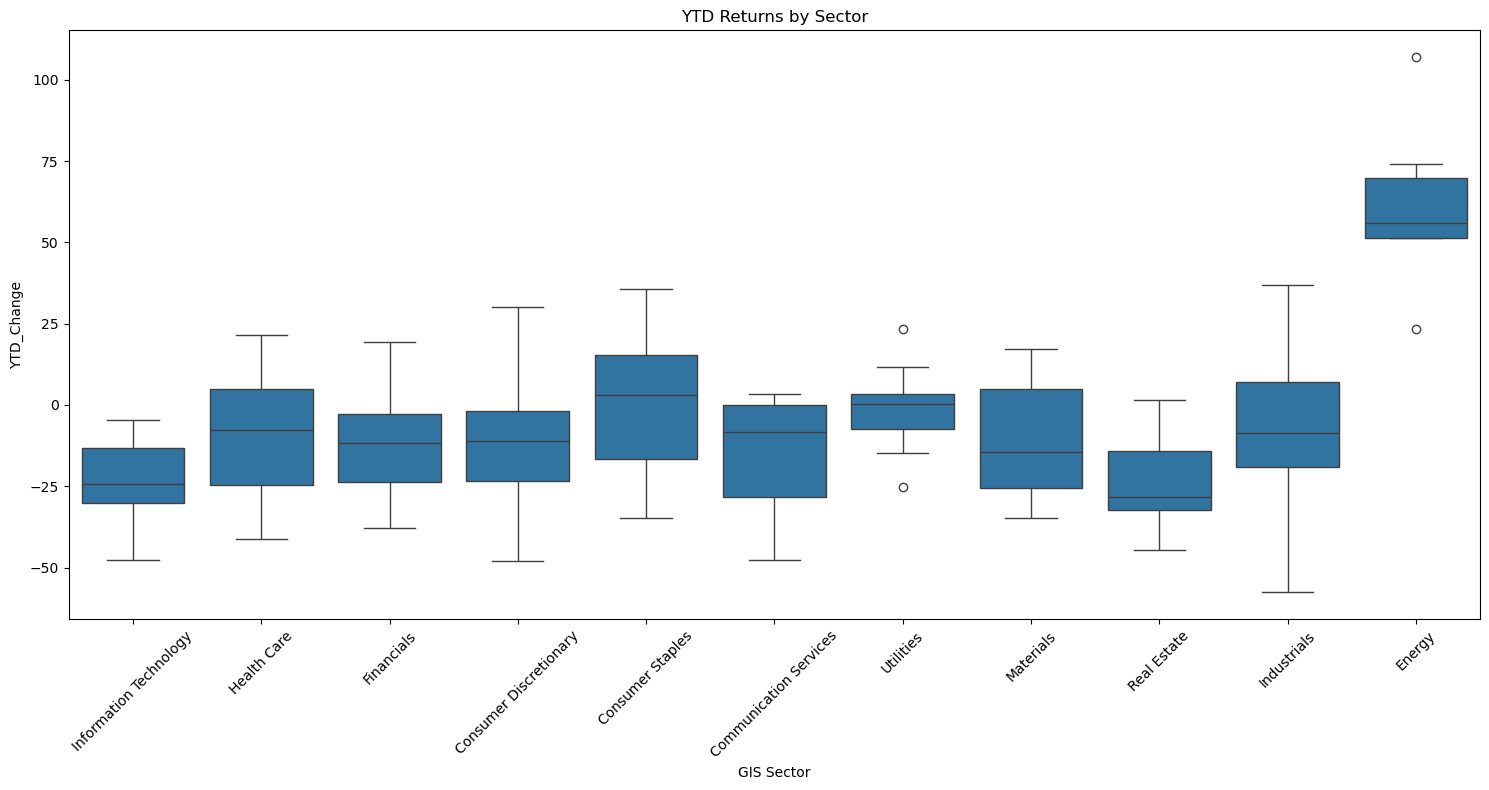

In [12]:
# Boxplot of Returns by Sector
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='GIS Sector', y='YTD_Change')
plt.xticks(rotation=45)
plt.title('YTD Returns by Sector')
plt.tight_layout()
plt.show()

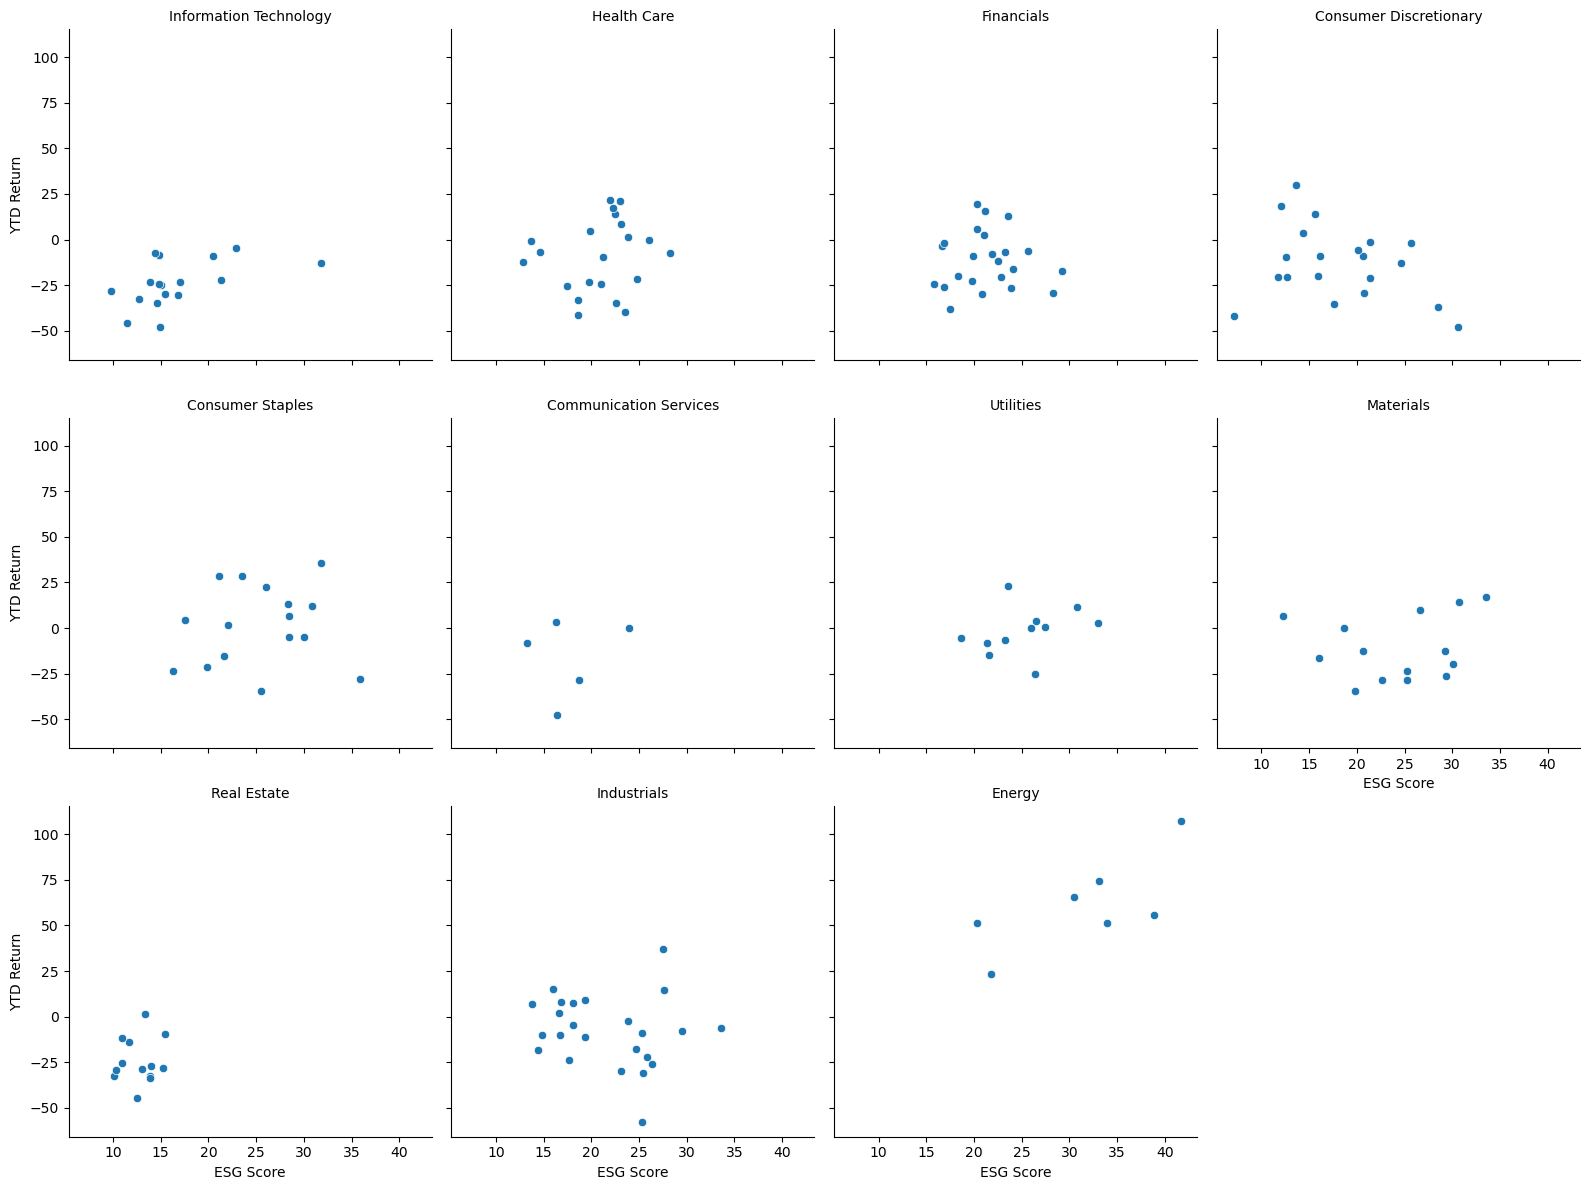

In [13]:
# Facet Grid of ESG vs Returns by Sector
g = sns.FacetGrid(df, col='GIS Sector', col_wrap=4, height=4)
g.map(sns.scatterplot, 'totalEsg', 'YTD_Change')
g.set_titles('{col_name}')
g.set_axis_labels('ESG Score', 'YTD Return')
plt.tight_layout()
plt.show()